<a href="https://colab.research.google.com/github/Azizahdahlan/Project-Data-Analysis-with-Python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kapan puncak penggunaan sepeda terjadi dalam satu hari? (jam tertentu)
- Pertanyaan 2 : Apakah suhu, kelembaban, atau kondisi cuaca (seperti hujan) memengaruhi permintaan sepeda?
- Pertanyaan 3 : Apakah pengguna kasual lebih aktif pada waktu tertentu dibandingkan pengguna berlangganan?
- Pertanyaan 4 : Bagaimana pola peminjaman dan pengembalian sepeda bervariasi berdasarkan jam dan musim?
- Pertanyaan 5 : Apakah jumlah penyewaan meningkat pada hari libur nasional atau akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Azizahdahlan/Project-Data-Analysis-with-Python/refs/heads/main/Bike-sharing-dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Azizahdahlan/Project-Data-Analysis-with-Python/refs/heads/main/Bike-sharing-dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- semua data berhasil di input, sehingga dilanjutkan dengan penilaian masing-masing kualitas datanya.

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [8]:
day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tipe data pada kolom dteday di kedua day_df dan hour_df merupakan 'object' padahal seharusnya datetime, sehingga di keduanya harus diubah menjadi tipe data datetime
- tidak terdapat duplikasi
- tidak terdapat missing value pada semua data
- tidak terlihat kenaehan pada data manapun, sehingga tidak menimbulkan inaccurate value


### Cleaning Data

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- terdapat perubahan setelah mengonversi tipe data kolom 'dtedays' dari object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explore The 1st Question
Pertanyaan 1 : **Kapan puncak penggunaan sepeda terjadi dalam satu hari? (jam tertentu)**

In [14]:
# Mengekstrak jam dari kolom 'hr' (sudah ada dalam dataset)
# Jam di dataset dalam format 0-23, tidak perlu transformasi
# Hitung jumlah penyewaan per jam
hourly_usage = hour_df.groupby('hr')['cnt'].sum().reset_index()

In [15]:
# Rename columns untuk kemudahan analisis
hourly_usage.columns = ['Hour', 'Total Rentals']

In [16]:
# Menentukan jam dengan penyewaan tertinggi
peak_hour = hourly_usage.loc[hourly_usage['Total Rentals'].idxmax()]
print(f"Puncak penggunaan sepeda terjadi pada pukul {peak_hour['Hour']} dengan total {peak_hour['Total Rentals']} penyewaan.")

Puncak penggunaan sepeda terjadi pada pukul 17 dengan total 336860 penyewaan.


**Insight:**
- Puncak penggunaan dalam satu hari terjadi pada pukul 17
- Total rental pada pukul 17 sebanyak 336860 penyewaan

### Explore The 2nd Question
Pertanyaan 2 : **Apakah suhu, kelembaban, atau kondisi cuaca (seperti hujan) memengaruhi permintaan sepeda?**

In [17]:
# Membuat pivot tabel
# Pivot 1: Rata-rata penyewaan berdasarkan kondisi cuaca (weathersit)
pivot_weather = hour_df.pivot_table(values='cnt', index='weathersit', aggfunc='mean').reset_index()
pivot_weather.columns = ['Weather Condition', 'Average Rentals']

# Menampilkan pivot tabel
print("Pivot Tabel: Rata-rata penyewaan berdasarkan kondisi cuaca")
print(pivot_weather)

Pivot Tabel: Rata-rata penyewaan berdasarkan kondisi cuaca
   Weather Condition  Average Rentals
0                  1       204.869272
1                  2       175.165493
2                  3       111.579281
3                  4        74.333333


**Insight:**
Note (Based on the Desc of Dataset):
- 1 : Clear, Few clouds, Partly cloudy
- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Sehingga, dapat disimpulkan bahwa **berdasarkan kondisi cuaca, orang cenderung lebih banyak menggunakan sepeda saat cuaca Clear, Few clouds, atau Partly cloudy**.

Sedangkan saat cuaca berawan, orang masih banyak yang minat untuk menyewa sepeda namun rata-rata penyewaan menurun sedikit.

In [18]:
# Pivot 2: Rata-rata penyewaan berdasarkan rentang suhu
# Membuat kategori suhu (binned temperature)
hour_df['temp_bins'] = pd.cut(hour_df['temp'], bins=5, labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])

pivot_temp = hour_df.pivot_table(values='cnt', index='temp_bins', aggfunc='mean').reset_index()
pivot_temp.columns = ['Temperature Range', 'Average Rentals']

# Menampilkan pivot tabel
print("\nPivot Tabel: Rata-rata penyewaan berdasarkan rentang suhu")
print(pivot_temp)


Pivot Tabel: Rata-rata penyewaan berdasarkan rentang suhu
  Temperature Range  Average Rentals
0         Very Cold        65.069159
1              Cold       123.066828
2              Mild       194.671096
3              Warm       260.695279
4               Hot       326.276446


<ipython-input-18-6db5f946c6d1>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_temp = hour_df.pivot_table(values='cnt', index='temp_bins', aggfunc='mean').reset_index()


**Insight:**
- Rentang Suhu Panas (Hot) memiliki rata-rata penyewaan tertinggi (326.28). Ini menunjukkan bahwa permintaan sepeda meningkat signifikan pada suhu yang lebih tinggi.
- Rentang Suhu Hangat (Warm) adalah yang kedua tertinggi (260.70), mengindikasikan bahwa orang merasa nyaman bersepeda dalam suhu hangat.
- Rentang Suhu Sedang (Mild) menunjukkan permintaan yang moderat (194.67).
- Rentang Suhu Dingin (Cold) dan Sangat Dingin (Very Cold) memiliki rata-rata penyewaan yang jauh lebih rendah (123.07 dan 65.07), kemungkinan karena suhu yang dingin membuat aktivitas bersepeda kurang nyaman.

In [19]:
# Pivot 3: Rata-rata penyewaan berdasarkan rentang kelembaban
hour_df['hum_bins'] = pd.cut(hour_df['hum'], bins=5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])

pivot_hum = hour_df.pivot_table(values='cnt', index='hum_bins', aggfunc='mean').reset_index()
pivot_hum.columns = ['Humidity Range', 'Average Rentals']

# Menampilkan pivot tabel
print("\nPivot Tabel: Rata-rata penyewaan berdasarkan rentang kelembaban")
print(pivot_hum)


Pivot Tabel: Rata-rata penyewaan berdasarkan rentang kelembaban
  Humidity Range  Average Rentals
0       Very Low       225.947368
1            Low       288.105285
2       Moderate       221.745683
3           High       172.896888
4      Very High       107.244204


<ipython-input-19-6fb83859fdff>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_hum = hour_df.pivot_table(values='cnt', index='hum_bins', aggfunc='mean').reset_index()


**Insight**
- Rentang Kelembaban Rendah (Low) memiliki rata-rata penyewaan tertinggi (288.11). Kelembaban rendah membuat aktivitas bersepeda lebih nyaman, mungkin karena udara lebih segar dan tidak terasa lembap.

- Rentang Kelembaban Sangat Tinggi (Very High) memiliki rata-rata penyewaan terendah (107.24). Kelembaban tinggi sering kali membuat udara terasa pengap, yang dapat mengurangi minat untuk bersepeda.

- Rentang Kelembaban Sedang (Moderate) dan Sangat Rendah (Very Low) memiliki rata-rata penyewaan yang hampir mirip (225.95 dan 221.75), menunjukkan kondisi ini cukup ideal untuk bersepeda.

- Rentang Kelembaban Tinggi (High) memiliki penurunan signifikan dalam penyewaan dibandingkan kelembaban rendah, mungkin karena kondisi ini mulai terasa tidak nyaman.



### Explore The 3rd Question
Pertanyaan 3 : **Apakah pengguna kasual lebih aktif pada waktu tertentu dibandingkan pengguna berlangganan?**

In [20]:
# Membuat pivot tabel untuk rata-rata penyewaan berdasarkan tipe pengguna dan jam
pivot_user = hour_df.groupby(['hr', 'workingday'])[['casual', 'registered']].mean().reset_index()

# Menampilkan pivot tabel
print("Pivot Tabel: Rata-rata Penyewaan Berdasarkan Jam")
print(pivot_user)

Pivot Tabel: Rata-rata Penyewaan Berdasarkan Jam
    hr  workingday      casual  registered
0    0           0   16.647826   74.152174
1    0           1    7.149194   29.637097
2    1           0   12.504348   57.004348
3    1           1    3.710526   12.842105
4    2           0   10.399123   42.771930
5    2           1    2.137577    6.546201
6    3           0    6.453744   19.321586
7    3           1    0.910638    4.031915
8    4           0    2.264317    6.000000
9    4           1    0.765957    4.663830
10   5           0    1.725225    6.963964
11   5           1    1.270707   23.642424
12   6           0    3.820961   14.921397
13   6           1    4.318548   98.181452
14   7           0    8.606061   34.800866
15   7           1   12.195565  278.417339
16   8           0   20.424242   85.229437
17   8           1   22.264113  454.741935
18   9           0   45.017316  126.606061
19   9           1   24.312500  217.205645
20  10           0   79.268398  176.640693
21  1

**Insight:**

1. Perbedaan Pola Penggunaan antara Pengguna Kasual dan Berlangganan:

- Pengguna Kasual (Casual):
  * Puncak aktivitas terjadi pada siang hari (jam 12-16), baik pada hari kerja maupun akhir pekan. Jam dengan rata-rata tertinggi adalah sekitar jam 14.

  * Aktivitas mereka menurun signifikan di pagi hari (jam 6-9) dan malam hari (jam 19 ke atas).

  * Pola ini menunjukkan bahwa pengguna kasual cenderung menggunakan sepeda untuk rekreasi atau aktivitas santai yang tidak terikat waktu tertentu.

- Pengguna Berlangganan (Registered):
  * Aktivitas mereka menunjukkan puncak yang jelas pada jam sibuk pagi (jam 8) dan sore (jam 17-18), terutama pada hari kerja.

  * Ini mengindikasikan bahwa pengguna berlangganan lebih banyak menggunakan sepeda untuk commuting (perjalanan ke tempat kerja atau sekolah).

2. Pengaruh Hari Kerja dan Akhir Pekan:

- Hari Kerja (Working Day = 1):
  * Pengguna berlangganan mendominasi, terutama pada jam sibuk pagi (jam 8) dan sore (jam 17).

  * Pengguna kasual memiliki rata-rata penggunaan lebih rendah sepanjang hari pada hari kerja, menunjukkan bahwa mereka lebih aktif di akhir pekan.

- Akhir Pekan (Working Day = 0):
  * Pengguna kasual menunjukkan aktivitas yang lebih merata sepanjang siang hari (jam 10-16) dengan puncak aktivitas sekitar jam 14.

  * Pengguna berlangganan tetap aktif, tetapi tidak seintens pada hari kerja.

3. Waktu dengan Pengguna Kasual Lebih Aktif:

- Pada siang hari (jam 12-16), pengguna kasual memiliki jumlah rata-rata penyewaan yang lebih tinggi dibandingkan pagi atau sore, terutama pada akhir pekan.
- Misalnya, pada jam 14 di akhir pekan, pengguna kasual memiliki rata-rata 139.59 penyewaan, yang jauh lebih tinggi dibandingkan pada jam sibuk pagi hari.



### Explore The 4th Question
Pertanyaan 4 : **Bagaimana pola peminjaman dan pengembalian sepeda bervariasi berdasarkan jam dan musim?**

In [21]:
# Membuat pivot tabel untuk total penyewaan berdasarkan jam dan musim
pivot_location = hour_df.groupby(['hr', 'season'])[['cnt']].sum().reset_index()
pivot_table = pivot_location.pivot(index='hr', columns='season', values='cnt')

# Menampilkan pivot tabel
print("Pivot Tabel: Total Penyewaan Berdasarkan Jam dan Musim")
print(pivot_table)

Pivot Tabel: Total Penyewaan Berdasarkan Jam dan Musim
season      1      2       3      4
hr                                 
0        4878  10459   13822   9971
1        3229   6481    8132   6322
2        2175   4302    5716   4159
3        1108   2084    2930   2052
4         490   1118    1541   1279
5        1830   3508    4947   3976
6        7261  14549   18946  14376
7       20655  40753   52000  40763
8       42095  69945   79204  69757
9       26316  43053   47927  42142
10      17939  34919   40405  32994
11      21575  42585   47319  39841
12      27131  51252   56458  49573
13      28175  52022   55656  49066
14      26605  48903   53060  47084
15      28018  51382   54221  49528
16      32999  63831   69516  61402
17      47780  95468  107562  86050
18      43110  88904  102330  75428
19      29837  65994   78383  52575
20      21211  47285   58505  37549
21      16497  35246   45147  28555
22      12440  26885   34416  21871
23       7994  17661   22986  15300


**Insight:**

*Note:*


1.   *Spring*
2.   *Summer*
3.   *Fall*
4.   *Winter*

a. Jam Sibuk Penyewaan:

* Penyewaan sepeda mencapai puncaknya pada jam 8 pagi (hr = 8) dan 5 sore (hr = 17), terlepas dari musim.
* Hal ini menunjukkan pola yang kuat bahwa banyak pengguna memanfaatkan sepeda untuk commuting (perjalanan kerja) selama jam sibuk pagi dan sore.

b. Pengaruh Musim terhadap Penyewaan:

* Musim 3 (Fall) menunjukkan total penyewaan tertinggi dibandingkan musim lainnya, terutama pada jam sibuk (8 pagi dan 5 sore).
* Musim 1 (Spring) memiliki total penyewaan terendah, menunjukkan bahwa cuaca sejuk saat spring memengaruhi aktivitas penyewaan sepeda.

c. Pola Aktivitas Malam:

* Setelah jam sibuk sore (setelah jam 17), jumlah penyewaan turun drastis di semua musim. Penyewaan pada malam hari (di atas jam 21) cukup rendah, menunjukkan bahwa pengguna sepeda lebih memilih untuk menggunakannya pada siang atau sore hari.

**Musim Spesifik**:
* Musim 1 (Spring):
  * Jumlah penyewaan jauh lebih rendah dibanding musim lainnya. Puncak penyewaan tetap pada jam sibuk, tetapi total penyewaan lebih sedikit.

* Musim 3 (Fall):
   * Penyewaan sepeda tertinggi di musim fall. Aktivitas sepeda pada musim ini cenderung lebih konsisten sepanjang hari dibandingkan musim lainnya.

* Musim 2 dan 4:
   * Penyewaan di musim summer dan winter berada di antara musim fall dan musim spring. Namun, puncak penyewaan tetap terlihat pada jam sibuk pagi dan sore.



### Explore The 5th Question
Pertanyaan 5 : **Apakah jumlah penyewaan meningkat pada hari libur atau akhir pekan?**

In [22]:
# Membuat kolom untuk menandai akhir pekan
day_df['is_weekend'] = day_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)  # 0 = Minggu, 6 = Sabtu

# Membuat pivot tabel rata-rata penyewaan berdasarkan jenis hari
pivot_weekend = day_df.groupby(['is_weekend'])[['cnt']].mean().reset_index()
pivot_weekend['Type'] = pivot_weekend['is_weekend'].map({1: 'Weekend/Holiday', 0: 'Weekday'})

# Menampilkan pivot tabel
print("Pivot Tabel: Rata-rata Penyewaan Berdasarkan Akhir Pekan atau Hari Kerja")
print(pivot_weekend)

Pivot Tabel: Rata-rata Penyewaan Berdasarkan Akhir Pekan atau Hari Kerja
   is_weekend          cnt             Type
0           0  4550.566219          Weekday
1           1  4389.685714  Weekend/Holiday


**Insight:**


1. Rata-rata Penyewaan Lebih Tinggi pada Hari Kerja (Weekday):

 - Rata-rata penyewaan pada hari kerja (Weekday) adalah 4550.57.
 - Sementara itu, rata-rata penyewaan pada akhir pekan atau hari libur (Weekend/Holiday) adalah 4389.69.
 - Ini menunjukkan bahwa penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan atau hari libur.

2. Kemungkinan Penyebab:

 - Pada hari kerja, pengguna sepeda kemungkinan besar adalah pengguna berlangganan yang menggunakan sepeda untuk keperluan perjalanan kerja (commuting).
 - Sebaliknya, pada akhir pekan atau hari libur, pengguna kasual mungkin lebih dominan, namun intensitas aktivitas mungkin lebih santai (rekreasi, olahraga).

3. Pola Perilaku Pengguna:

* Hari Kerja (Weekday):
  - Penyewaan sepeda meningkat karena jadwal rutin seperti pergi/pulang kerja, terutama pada jam sibuk pagi dan sore.
* Akhir Pekan atau Libur (Weekend/Holiday):
 - Meskipun lebih sedikit dibanding hari kerja, permintaan masih signifikan, yang mungkin didorong oleh aktivitas rekreasi atau liburan.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan puncak penggunaan sepeda terjadi dalam satu hari? (jam tertentu)

<ipython-input-23-e6e929f856f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Hour', y='Total Rentals', data=hourly_usage, palette='viridis')


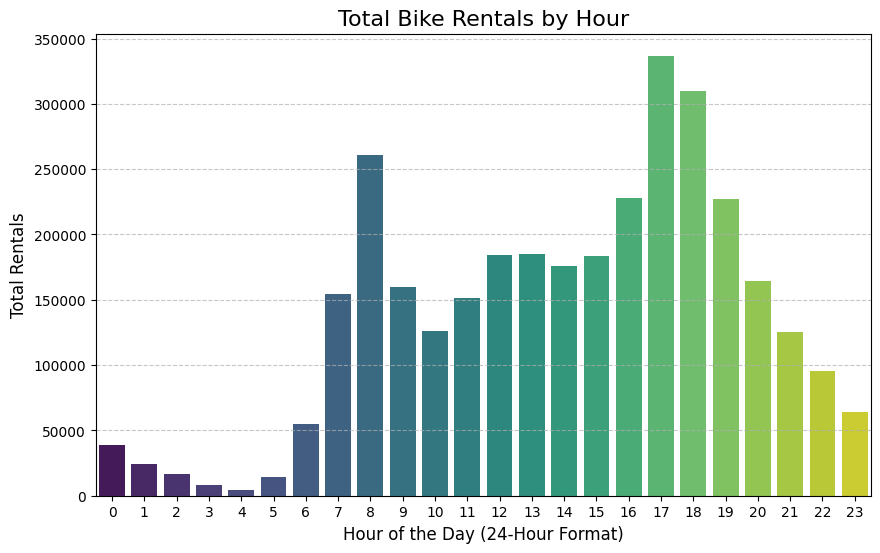

In [23]:
# Visualisasi: Plot tren penggunaan sepeda per jam
plt.figure(figsize=(10, 6))
sn.barplot(x='Hour', y='Total Rentals', data=hourly_usage, palette='viridis')
plt.title('Total Bike Rentals by Hour', fontsize=16)
plt.xlabel('Hour of the Day (24-Hour Format)', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2: Apakah suhu, kelembaban, atau kondisi cuaca (seperti hujan) memengaruhi permintaan sepeda?

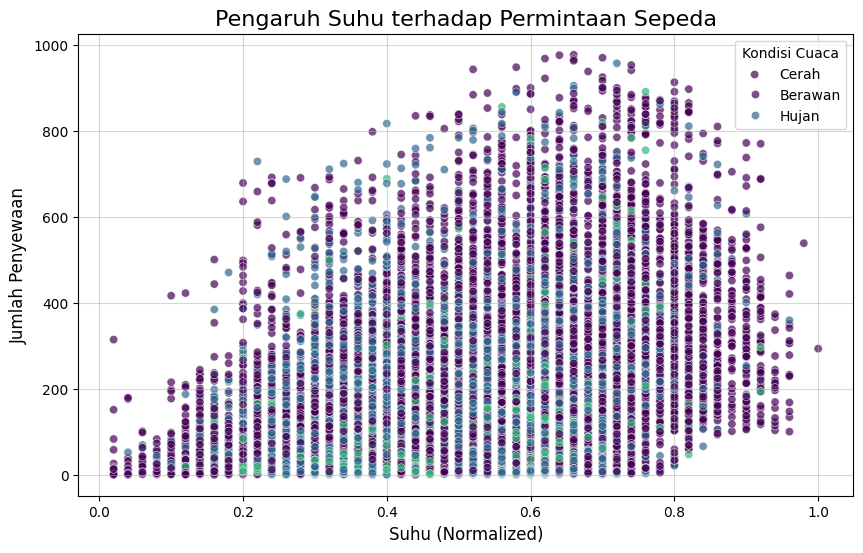

In [24]:
# Distribusi penyewaan berdasarkan suhu
plt.figure(figsize=(10, 6))
sn.scatterplot(x='temp', y='cnt', data=hour_df, alpha=0.7, hue='weathersit', palette='viridis')
plt.title('Pengaruh Suhu terhadap Permintaan Sepeda', fontsize=16)
plt.xlabel('Suhu (Normalized)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.legend(title='Kondisi Cuaca', labels=['Cerah', 'Berawan', 'Hujan'])
plt.grid(alpha=0.5)
plt.show()

<ipython-input-25-1300d5fa2625>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Weather Condition', y='Average Rentals', data=pivot_weather, palette='coolwarm')


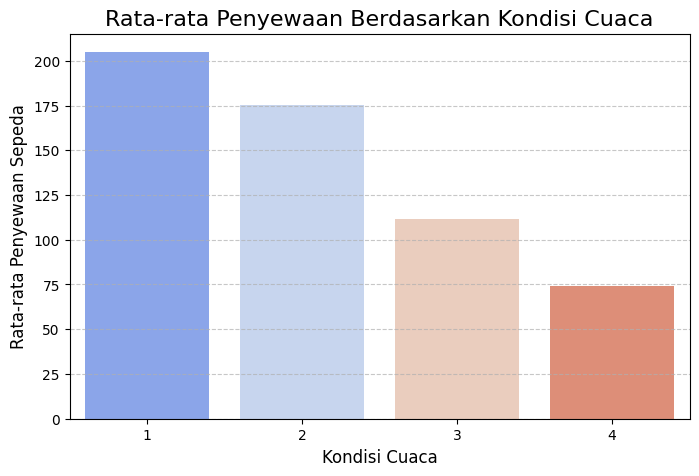

In [25]:
# Rata-rata penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(8, 5))
sn.barplot(x='Weather Condition', y='Average Rentals', data=pivot_weather, palette='coolwarm')
plt.title('Rata-rata Penyewaan Berdasarkan Kondisi Cuaca', fontsize=16)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-26-c26114718a66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='Humidity Range', y='Average Rentals', data=pivot_hum, palette='Blues')


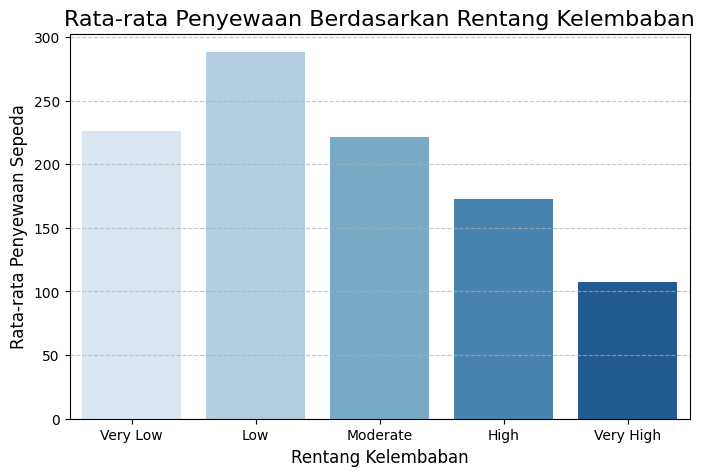

In [26]:
# Visualisasi menggunakan bar plot
plt.figure(figsize=(8, 5))
sn.barplot(x='Humidity Range', y='Average Rentals', data=pivot_hum, palette='Blues')
plt.title('Rata-rata Penyewaan Berdasarkan Rentang Kelembaban', fontsize=16)
plt.xlabel('Rentang Kelembaban', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

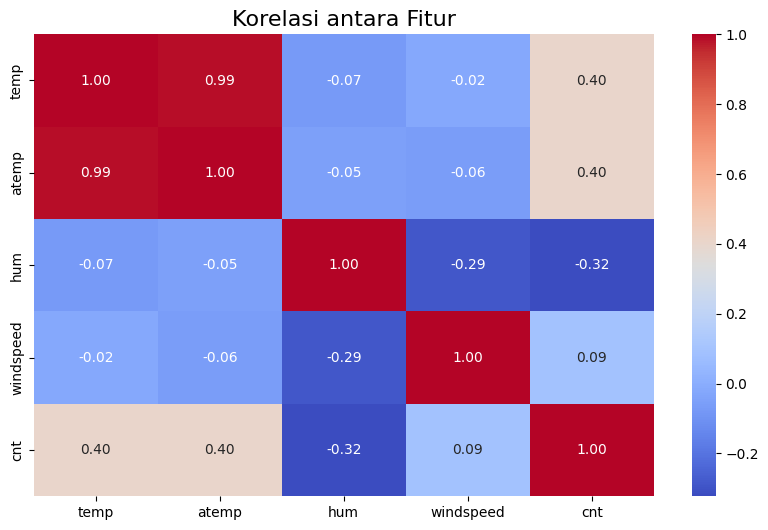

In [27]:
# Korelasi antara fitur numerik
plt.figure(figsize=(10, 6))
correlation_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara Fitur', fontsize=16)
plt.show()

**Insight:**

**Korelasi Positif**

1. temp dan cnt (0.40):

- Ada korelasi positif moderat antara suhu (temp) dan jumlah penyewaan sepeda (cnt).
- Artinya, semakin tinggi suhu, cenderung semakin banyak sepeda yang disewa.

2. atemp dan cnt (0.40):

- Korelasi positif antara suhu yang dirasakan (atemp) dan jumlah penyewaan sepeda (cnt).
- Ini konsisten dengan pengaruh suhu pada kenyamanan saat bersepeda.
3. temp dan atemp (0.99):

- Korelasi sangat kuat antara suhu aktual (temp) dan suhu yang dirasakan (atemp), yang wajar karena kedua variabel ini saling terkait.

**Korelasi Negatif**

1. hum dan cnt (-0.32):

- Ada korelasi negatif antara kelembaban (hum) dan jumlah penyewaan sepeda (cnt).
- Artinya, kelembaban tinggi cenderung mengurangi minat dalam penyewaan sepeda.
2. windspeed dan cnt (0.09):

- Korelasi antara kecepatan angin (windspeed) dan jumlah penyewaan sepeda (cnt) sangat rendah, hampir tidak ada hubungan.
- Kecepatan angin kemungkinan tidak memengaruhi keputusan pengguna secara signifikan.


# Pertanyaan 3: Apakah pengguna casual lebih aktif pada waktu tertentu dibandingkan pengguna registered?

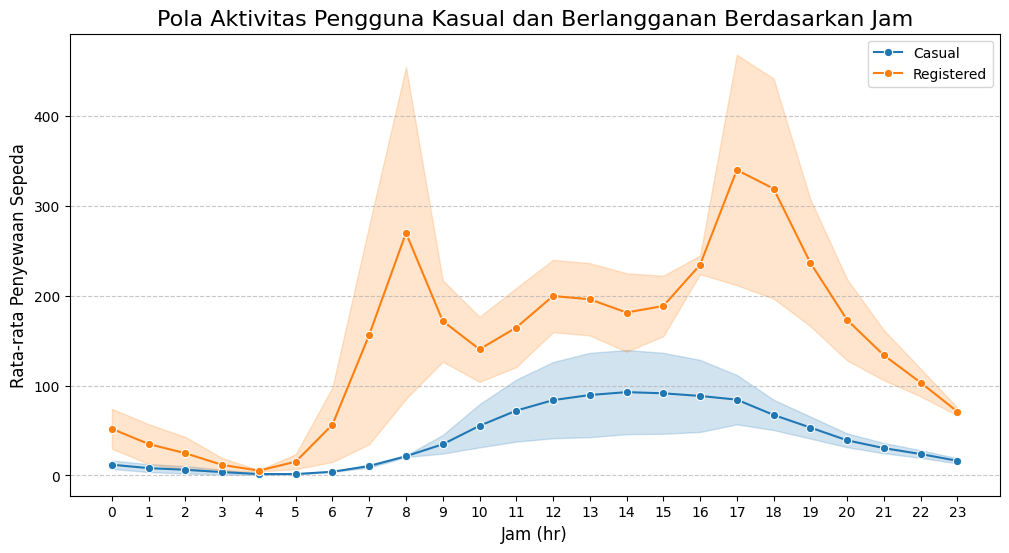

In [28]:
# Visualisasi pola aktivitas pengguna kasual vs berlangganan
plt.figure(figsize=(12, 6))
sn.lineplot(data=pivot_user, x='hr', y='casual', label='Casual', marker='o')
sn.lineplot(data=pivot_user, x='hr', y='registered', label='Registered', marker='o')
plt.title('Pola Aktivitas Pengguna Kasual dan Berlangganan Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

1. Perbedaan Pola Penggunaan Antara Kasual dan Berlangganan:

- Pengguna Kasual:
  * Aktivitas mereka menunjukkan tren yang meningkat secara bertahap mulai dari pagi hari hingga mencapai puncak pada jam 14-15.

  * Setelah puncak siang hari, aktivitas pengguna kasual menurun perlahan hingga malam.

  * Pola ini menunjukkan bahwa pengguna kasual lebih cenderung menggunakan sepeda untuk aktivitas santai atau rekreasi di siang hari.

- Pengguna Berlangganan:
  * Terdapat dua puncak aktivitas yang jelas:
    * Puncak pertama di jam sibuk pagi (jam 8).
    * Puncak kedua di jam sibuk sore (jam 17-18).
  * Setelah jam sibuk sore, aktivitas mereka menurun tajam di malam hari.
  * Pola ini konsisten dengan pengguna sepeda yang menggunakan layanan ini untuk commuting (perjalanan ke/dari tempat kerja).

2. Dominasi Aktivitas:

- Pada jam sibuk pagi (jam 7-9) dan sore (jam 17-18), pengguna berlangganan mendominasi jumlah penyewaan sepeda.
- Di tengah hari (jam 10-15), pengguna kasual memiliki jumlah penyewaan yang lebih stabil dibandingkan dengan pengguna berlangganan.

3. Variasi Waktu Penggunaan:

- Pengguna kasual memiliki pola yang lebih merata sepanjang siang hari.
- Pengguna berlangganan memiliki pola yang lebih tajam dan terfokus pada jam-jam tertentu (pagi dan sore).




# Pertanyaan 4: Bagaimana pola peminjaman dan pengembalian sepeda bervariasi berdasarkan jam dan musim?

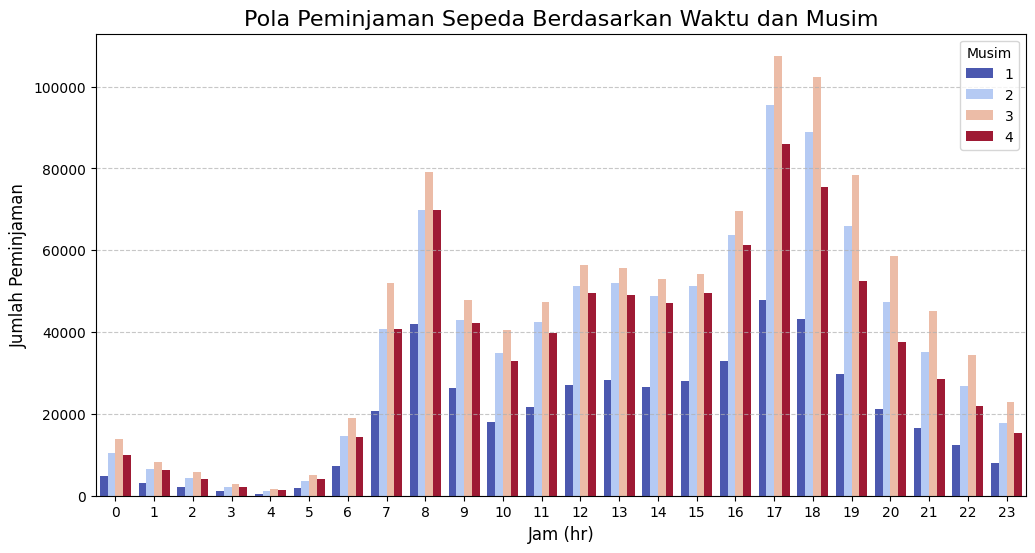

In [29]:
# Grupkan berdasarkan lokasi dan jam untuk memeriksa pola peminjaman dan pengembalian
df_location = hour_df.groupby(['hr', 'season'])[['cnt']].sum().reset_index()

# Visualisasi pola peminjaman sepeda berdasarkan lokasi dan waktu
plt.figure(figsize=(12, 6))
sn.barplot(data=df_location, x='hr', y='cnt', hue='season', palette='coolwarm')
plt.title('Pola Peminjaman Sepeda Berdasarkan Waktu dan Musim', fontsize=16)
plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Jumlah Peminjaman', fontsize=12)
plt.legend(title='Musim')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
1. Pola Peminjaman Berdasarkan Jam:

* Jam Sibuk:
  * Aktivitas peminjaman sepeda mencapai puncaknya pada dua waktu utama:
    * Pagi hari (sekitar jam 7-9): Kemungkinan besar terkait dengan kebutuhan perjalanan ke tempat kerja atau sekolah.
    * Sore hari (sekitar jam 17-19): Kemungkinan besar untuk perjalanan pulang dari tempat kerja atau aktivitas sore lainnya.
* Jam Malam:
  * Aktivitas menurun drastis setelah jam 20, menunjukkan sedikitnya pengguna di malam hari.
* Jam Dini Hari (0-5):
  * Aktivitas peminjaman sangat rendah, menunjukkan bahwa layanan sepeda jarang digunakan pada waktu tersebut.

2. Pengaruh Musim terhadap Peminjaman:

* Musim 2 (Summer) dan Musim 3 (Fall):
  * Jumlah peminjaman terlihat lebih tinggi dibandingkan musim lainnya, terutama selama jam sibuk pagi dan sore.
  * Ini menunjukkan bahwa cuaca yang lebih hangat dan nyaman meningkatkan penggunaan sepeda.

* Musim 1 (Spring):
  * Aktivitas peminjaman juga cukup tinggi, namun tidak setinggi musim panas/gugur, kemungkinan karena transisi dari cuaca dingin ke hangat.

* Musim 4 (Winter):
  * Peminjaman jauh lebih rendah, terutama di pagi hari, menunjukkan cuaca dingin menjadi penghalang utama bagi pengguna.


# Pertanyaan 5: Apakah jumlah penyewaan meningkat pada hari libur nasional atau akhir pekan?

<ipython-input-30-b0fdbfcd79b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=pivot_weekend, x='Type', y='cnt', palette='viridis')


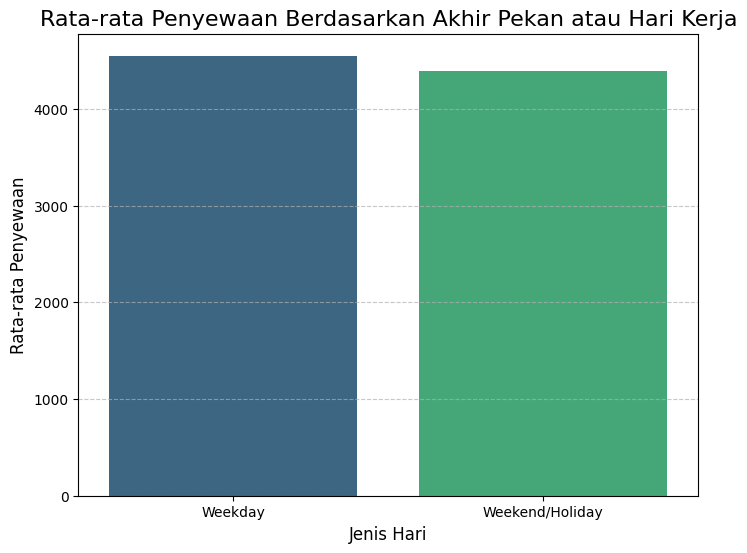

In [30]:
# Visualisasi rata-rata penyewaan
plt.figure(figsize=(8, 6))
sn.barplot(data=pivot_weekend, x='Type', y='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Berdasarkan Akhir Pekan atau Hari Kerja', fontsize=16)
plt.xlabel('Jenis Hari', fontsize=12)
plt.ylabel('Rata-rata Penyewaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**

1. Perbedaan Rata-rata Penyewaan:

- Weekday (Hari Kerja) memiliki rata-rata penyewaan sedikit lebih tinggi dibandingkan Weekend/Holiday (Akhir Pekan atau Hari Libur).
- Perbedaannya tidak terlalu signifikan, menunjukkan bahwa sepeda digunakan secara konsisten baik pada hari kerja maupun akhir pekan.

2. Penggunaan Sepeda yang Konsisten:

- Aktivitas penyewaan tetap stabil pada kedua jenis hari, yang bisa berarti:
  - Sepeda digunakan tidak hanya untuk perjalanan kerja tetapi juga untuk rekreasi atau keperluan lain selama akhir pekan dan libur.

## Conclusion

- puncak penggunaan sepeda terjadi pada pukul 17
- Suhu memiliki korelasi positif dengan jumlah penyewaan sepeda.
- Jumlah penyewaan sepeda meningkat seiring dengan kenaikan suhu, dengan puncaknya pada suhu panas (Hot).
- Suhu hangat hingga panas menciptakan kondisi ideal untuk bersepeda, sementara suhu dingin mengurangi jumlah penyewaan.
- Pola aktivitas pengguna kasual dan berlangganan berbeda: kasual cenderung menggunakan sepeda untuk rekreasi, sementara pelanggan menggunakan sepeda untuk aktivitas rutin, seperti perjalanan kerja.
Aktivitas penyewaan puncak terjadi pada pagi (07.00–09.00) dan sore/malam (17.00–19.00), mengindikasikan penggunaan untuk perjalanan ke/dari tempat kerja.
- Jumlah penyewaan pada hari kerja sedikit lebih tinggi dibandingkan dengan akhir pekan/libur, tetapi perbedaannya kecil.
- Hal ini menunjukkan bahwa sepeda digunakan baik untuk perjalanan kerja maupun aktivitas rekreasi.

Explore All data

In [31]:
all_df = pd.merge(
    left = day_df,
    right = hour_df,
    how = "left",
    left_on = "instant",
    right_on = "instant"
)
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,temp_bins,hum_bins
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,1,0.24,0.2879,0.81,0.0,3,13,16,Cold,Very High
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,1,0.22,0.2727,0.80,0.0,8,32,40,Cold,High
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,1,0.22,0.2727,0.80,0.0,5,27,32,Cold,High
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,1,0.24,0.2879,0.75,0.0,3,10,13,Cold,High
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,1,0.24,0.2879,0.75,0.0,0,1,1,Cold,High


In [32]:
all_df.to_csv("all_data.csv", index = False)